# Evaluation of regression and classification models : effect of outliers

This code is a complement to PyTerK environment notebooks. It allows to gather all desired model evaluation in a table, using similar method than PyTerK. 

In this notebook, we are evaluating models assessed in [Evaluation_tables_model_assessement](./Evaluation_tables_model_assessement.ipynb) on different datasets. The train data, test data and models are loaded for each iteration and k-folds. Predictions are performed from train data. Extected and predicted values are stored.

Regression models are evaluatied through adjusted $R^2$ of the regression between expected and predicted values. For adjusted $R^2$, the size of the dataset correspond to ```len(y_pred)```and the number of independant variables is 1 as predicted values are supposed to be equal to expected values. 

___________________________________________________________________________________________________________________________________

*Example of tree structure obtained from training of best Neural Network (NN), Random Forest (RF) and SVM regression and classification models, for different ouputs and different datasets. Note that for an easier PyTerK use NN training should be seperated from RF and SVM*

* campaign09r : regression models 
    * Fit_E : output of the model
        * Fit_E_0000 : model n°1 dataset n°1   _eg: RF on Raw data_
        * Fit_E_0001 : model n°2 dataset n°1   _eg: NN on Raw data_
        * Fit_E_0002 : model n°3 dataset n°1   _eg: SVM on Raw data_
        * Fit_E_0003 : model n°1 dataset n°2   _eg: RF on Statistically processed data_
        * Fit_E_0004 : model n°2 dataset n°2   _eg: NN on Statistically processed data_
        * Fit_E_0005 : model n°3 dataset n°2   _eg: SVM on Statistically processed data_
    * Fit_H
    * Fit_CI
    * Fit_IQ 
* campaign09c: classification models
    * Class_EBSD
        * Class_EBSD_0000 : model n°1 *eg: RF on Averaged_data*
        * Classe_EBSD_0001 : model n°2 *eg: SVM on Averaged_data*
    * Class_XRD
* campaign09cNN: classification models
    * Class_EBSD
        * Class_EBSD_0000 : model n°1 *eg: NN on Averaged_data*
    * Class_XRD


## Import libraries 

In [26]:
import numpy as np
import os, json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import hamming_loss

## Regression models

### Get path to stored results of iterative k-fold crossvalidation trainings of the models on different outputs (`fit`) on different datasets

In [27]:
run_dir=os.getenv('RUN_DIR')
directory=f"{run_dir}campaign09r/"
fit=['Fit_E','Fit_H', 'Fit_CI','Fit_IQ']

### Calculation of adjusted $R^2$ for each model, datasets and output

In [28]:
for num_pred in range (0,len(fit)):

    run_dir=directory+'/'+fit[num_pred]+'/'
    
    # Let's go down the different models and outputs
    subdirs = [f.path for f in os.scandir(run_dir) if f.is_dir() and not f.name.startswith('.')]
    subdirs = sorted(subdirs)
           
     # Dataframe to store the metrics of each training : initialisation with an empty column
    df_r2_adj_models=pd.DataFrame(columns=['model0'])
    # Dataframe to store the mean and std of metrics for each model: : initialisation with an empty column
    df_r2_adj_mean_std=pd.DataFrame(columns=['model0'],index=['R2 adj mean','R2 adj std'])
    
    i=0
    for s in subdirs:
        r2_adj_table=[]
        about= json.load(open(s+'/about.json'))
        name_model=about['args']['model_id']
        name_database=about['args']['dataset_id']
        # For all iteration and all k-fold
        iteration=[f.path for f in os.scandir(s) if f.is_dir() and not f.name.startswith('.')]
        for it in iteration:
            k_fold=[f.path for f in os.scandir(it) if f.is_dir() and not f.name.startswith('.')]
            for k in k_fold:
                with open(k+'/yytest.json') as fd:
                    yy = json.load(fd)
                    y_pred=np.reshape(np.array(yy['y_pred']),(np.shape(np.array(yy['y_pred']))[0]))
                    y_test=np.reshape(np.array(yy['y_test']),(np.shape(np.array(yy['y_test']))[0]))
                    corr_matrix = np.corrcoef(y_test,y_pred)
                    corr = corr_matrix[0,1]
                    R2 = corr**2
                    R2_adj=1-((1-R2)*(len(y_test)-1))/(len(y_test)-1-1)
                    r2_adj_table.append(R2_adj)
        
        df_r2_adj_models[name_model + ' on ' + name_database]=r2_adj_table
        df_r2_adj_mean_std[name_model + ' on ' + name_database]=[np.mean(r2_adj_table),np.std(r2_adj_table)]                                              
        i+=1

    display(fit[num_pred])
    del df_r2_adj_mean_std['model0'] # delete empty initialisation column
    
    # Print table of evaluation of each model (mean and std of metrics)    
    df_r2_adj_mean_std=df_r2_adj_mean_std.T
    display(df_r2_adj_mean_std)
  
    # Save evaluations 
    df_r2_adj_mean_std.to_csv(f'{directory}results/regression/R2_adj_mean_std_'+'_'+fit[num_pred]+'.csv')                                                    

'Fit_E'

,R2 adj mean,R2 adj std
sklearn-RF-100-10 on compo_E_w_outliers,0.809519,0.039540
keras-100x100x100x100 on compo_E_w_outliers,0.822296,0.039730
sklearn-nuSVR-rbf-0.5-1000 on compo_E_w_outliers,0.822492,0.043968
sklearn-RF-100-10 on compo_E_threshold,0.922865,0.027377
keras-100x100x100x100 on compo_E_threshold,0.925978,0.030817
sklearn-nuSVR-rbf-0.5-1000 on compo_E_threshold,0.917297,0.027973
sklearn-RF-100-10 on compo_E_wo_outliers,0.970381,0.012010
keras-100x100x100x100 on compo_E_wo_outliers,0.967212,0.010564
sklearn-nuSVR-rbf-0.5-1000 on compo_E_wo_outliers,0.956750,0.009596
sklearn-RF-100-10 on compo_E_wo_outliers_averaged,0.937636,0.019874


'Fit_H'

,R2 adj mean,R2 adj std
sklearn-rfr-150-10 on compo_H_w_outliers,0.751382,0.051649
keras-100x100x100x100 on compo_H_w_outliers,0.749563,0.050956
sklearn-nuSVR-rbf-0.5-1000 on compo_H_w_outliers,0.743372,0.058472
sklearn-rfr-150-10 on compo_H_threshold,0.889023,0.035320
keras-100x100x100x100 on compo_H_threshold,0.889302,0.039366
sklearn-nuSVR-rbf-0.5-1000 on compo_H_threshold,0.878608,0.036863
sklearn-rfr-150-10 on compo_H_wo_outliers,0.963348,0.008894
keras-100x100x100x100 on compo_H_wo_outliers,0.963586,0.007930
sklearn-nuSVR-rbf-0.5-1000 on compo_H_wo_outliers,0.945817,0.012468
sklearn-rfr-150-10 on compo_H_wo_outliers_averaged,0.921396,0.021172


'Fit_CI'

,R2 adj mean,R2 adj std
sklearn-rfr-150-5 on compo_CI,0.898610,0.056511
keras-50x100x100x50 on compo_CI,0.945278,0.039888
sklearn-nuSVR-rbf-0.8-100 on compo_CI,0.936332,0.039644


'Fit_IQ'

,R2 adj mean,R2 adj std
sklearn-rfr-50-5 on compo_IQ,0.901663,0.056292
keras-100x100x100x100 on compo_IQ,0.745073,0.062377
sklearn-nuSVR-poly3-0.2-1000 on compo_IQ,0.642306,0.100751


## Classification models

### Get paths for models to evaluate: stored results of iterative k-fold crossvalidation trainings (```run```) for different outputs (```classifications```)
Add prediction type : to compute the metrics we need only classes. If the prediction type is other, then we correct it.

In [29]:
run_dir=os.getenv('RUN_DIR')
directory=[f"{run_dir}/campaign09cNN", f"{run_dir}/campaign09c"]
classification=['Class_EBSD','Class_XRD']
predict_type_list=['sigmoid', 'classes']

/Users/elisegarel/Desktop/PUBLI/run//campaign09cNN/Class_EBSD/


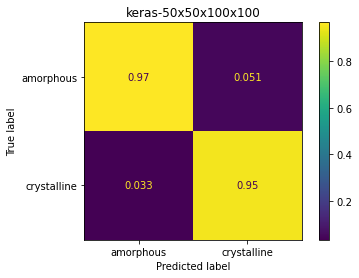

'Class_EBSD'

,accuracy mean,accuracy std,recall amorphous mean,recall amorphous std,precision amorphous mean,precision amorphous std,F1 amorphous mean,F1 amorphous std,recall cristalline mean,recall cristalline std,precision cristalline mean,precision cristalline std,F1 cristalline mean,F1 cristalline std,F1 weighted mean,F1 weighted std,Hamming loss mean,Hamming loss std
keras-50x50x100x100 on compo_CI_class,0.957545,0.023285,0.946246,0.027602,0.967038,0.029206,0.956285,0.024086,0.967928,0.028301,0.948865,0.026358,0.958093,0.023501,0.957529,0.023279,0.042455,0.023285


/Users/elisegarel/Desktop/PUBLI/run//campaign09cNN/Class_XRD/


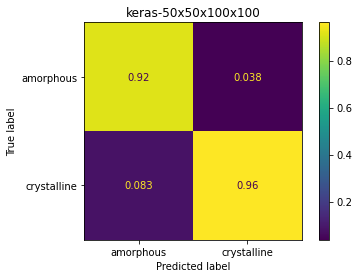

'Class_XRD'

,accuracy mean,accuracy std,recall amorphous mean,recall amorphous std,precision amorphous mean,precision amorphous std,F1 amorphous mean,F1 amorphous std,recall cristalline mean,recall cristalline std,precision cristalline mean,precision cristalline std,F1 cristalline mean,F1 cristalline std,F1 weighted mean,F1 weighted std,Hamming loss mean,Hamming loss std
keras-50x50x100x100 on compo_DRX_class,0.947181,0.026381,0.925105,0.052937,0.916628,0.046857,0.919839,0.041013,0.958273,0.023513,0.96231,0.028074,0.960014,0.020546,0.947206,0.026599,0.052819,0.026381


/Users/elisegarel/Desktop/PUBLI/run//campaign09c/Class_EBSD/


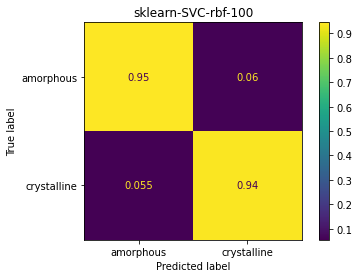

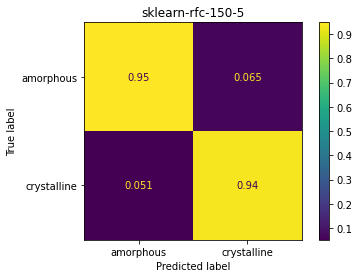

'Class_EBSD'

,accuracy mean,accuracy std,recall amorphous mean,recall amorphous std,precision amorphous mean,precision amorphous std,F1 amorphous mean,F1 amorphous std,recall cristalline mean,recall cristalline std,precision cristalline mean,precision cristalline std,F1 cristalline mean,F1 cristalline std,F1 weighted mean,F1 weighted std,Hamming loss mean,Hamming loss std
sklearn-SVC-rbf-100 on compo_CI_class,0.942320,0.020571,0.936770,0.03538,0.945793,0.033886,0.940491,0.022269,0.947794,0.032843,0.940143,0.032154,0.943259,0.020408,0.942295,0.020589,0.057680,0.020571
sklearn-rfc-150-5 on compo_CI_class,0.941661,0.022928,0.932495,0.03736,0.949440,0.035478,0.940034,0.023326,0.951155,0.035140,0.935458,0.037149,0.942424,0.023839,0.941647,0.022913,0.058339,0.022928


/Users/elisegarel/Desktop/PUBLI/run//campaign09c/Class_XRD/


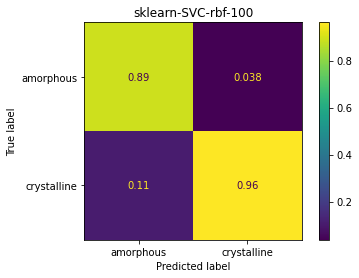

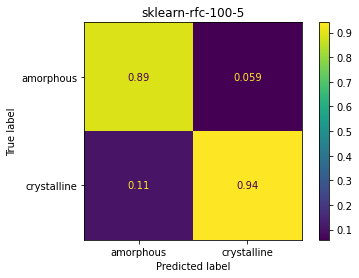

'Class_XRD'

,accuracy mean,accuracy std,recall amorphous mean,recall amorphous std,precision amorphous mean,precision amorphous std,F1 amorphous mean,F1 amorphous std,recall cristalline mean,recall cristalline std,precision cristalline mean,precision cristalline std,F1 cristalline mean,F1 cristalline std,F1 weighted mean,F1 weighted std,Hamming loss mean,Hamming loss std
sklearn-SVC-rbf-100 on compo_DRX_class,0.938565,0.023129,0.926613,0.044749,0.893099,0.048219,0.908416,0.034619,0.945075,0.024343,0.962086,0.025083,0.953218,0.018520,0.938874,0.023005,0.061435,0.023129
sklearn-rfc-100-5 on compo_DRX_class,0.926046,0.028271,0.882871,0.065837,0.894889,0.052168,0.886863,0.043324,0.948277,0.026303,0.941619,0.034566,0.944444,0.022195,0.925829,0.028655,0.073954,0.028271


In [30]:
# For each run/kind of models and each outputs/predictions
for d in range (0,len(directory)):
    for num_pred in range (0,len(classification)):
        
        # Let's go through the different kind of models and outputs — eg: campaign09c/Class_EBSD
        run_dir=directory[d]+'/'+classification[num_pred]+'/'
        
        # Subdirs= all models for one outputs, on different datasets — eg : campaign09c/Class_EBSD/Class_EBSD_0000
        subdirs = [f.path for f in os.scandir(run_dir) if f.is_dir() and not f.name.startswith('.')]
        subdirs = sorted(subdirs)
        #print(subdirs)

        # Dataframe to store the metrics of each training : initialisation with an empty column
        df_metrics_models=pd.DataFrame(columns=['model0'])

        # Dataframe to store the mean and std of metrics for each model: : initialisation with an empty column
        df_metrics_mean_std=pd.DataFrame(columns=['model0'],
                                            index=['accuracy mean','accuracy std',
                                                'recall amorphous mean', 'recall amorphous std', 
                                                'precision amorphous mean','precision amorphous std',
                                                'F1 amorphous mean','F1 amorphous std',
                                                'recall cristalline mean', 'recall cristalline std', 
                                                'precision cristalline mean','precision cristalline std',
                                                'F1 cristalline mean','F1 cristalline std',
                                                'F1 weighted mean' , 'F1 weighted std',
                                                'Hamming loss mean', 'Hamming loss std'])
        
        
        for s in subdirs:
            accuracy_table=[]
            recall_table_amorphe=[]
            precision_table_amorphe=[]
            F1_table_amorphe=[]
            recall_table_crist=[]
            precision_table_crist=[]
            F1_table_crist=[]
            F1_table_weighted=[]
            Hml_table=[]
            y_pred_list=[]
            y_test_list=[]
            
            
            about= json.load(open(s+'/about.json'))
            name_model=about['args']['model_id']
            name_database=about['args']['dataset_id']

            # For all iteration and all k-fold
            iteration=[f.path for f in os.scandir(s) if f.is_dir() and not f.name.startswith('.')]
            for it in iteration:
                k_fold=[f.path for f in os.scandir(it) if f.is_dir() and not f.name.startswith('.')]
                for k in k_fold:
                    with open(k+'/yytest.json') as fd:
                        yy = json.load(fd)
                        y_pred=np.array(yy['y_pred'])
                        y_test=np.array(yy['y_test'])

                        # Transform output into class 
                        predict_type=predict_type_list[d]
                        if predict_type=='softmax':
                            y_pred = np.array( [ np.argmax(y) for y in y_pred] )
                        if predict_type=='sigmoid':
                            y_pred = np.array( [ 0 if y<0.5 else 1 for y in y_pred] )
                        if predict_type=='classes':
                            y_pred = y_pred.squeeze()
                        metrics =pd.DataFrame(classification_report(y_test,y_pred,output_dict=True)).T
                        
                        amorph_key=metrics['recall'].keys()[0]
                        cryst_key=metrics['recall'].keys()[1]
                        
                        accuracy_table.append(metrics['precision']['accuracy'])
                        recall_table_amorphe.append(metrics['recall'][amorph_key])
                        precision_table_amorphe.append(metrics['precision'][amorph_key])
                        F1_table_amorphe.append(metrics['f1-score'][amorph_key])
                        recall_table_crist.append(metrics['recall'][cryst_key])
                        precision_table_crist.append(metrics['precision'][cryst_key])
                        F1_table_crist.append(metrics['f1-score'][cryst_key])
                        F1_table_weighted.append(metrics['f1-score']['weighted avg'])
                        Hml_table.append(hamming_loss(y_test, y_pred))
                        y_pred_list.extend(y_pred)
                        y_test_list.extend(y_test)
                        
            
            df_metrics_mean_std[name_model + ' on ' + name_database]=[np.mean(accuracy_table),np.std(accuracy_table),
                                                                    np.mean(recall_table_amorphe),np.std(recall_table_amorphe),
                                                                    np.mean(precision_table_amorphe),np.std(precision_table_amorphe),
                                                                    np.mean(F1_table_amorphe),np.std(F1_table_amorphe),
                                                                    np.mean(recall_table_crist),np.std(recall_table_crist),
                                                                    np.mean(precision_table_crist),np.std(precision_table_crist),
                                                                    np.mean(F1_table_crist),np.std(F1_table_crist),
                                                                    np.mean(F1_table_weighted),np.std(F1_table_weighted),
                                                                    np.mean(Hml_table),np.std(Hml_table)]                                            

            # Plot confusion matrix from all expected and predicted values.                                    
            cm = confusion_matrix( y_test_list, y_pred_list, normalize="pred")
            
            disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['amorphous','crystalline'])
            disp.plot()
            plt.title(name_model)
            plt.show()    
            n+=1

        
        display(classification[num_pred])
        del df_metrics_mean_std['model0'] # suppress initialisation empty column

        # Print table of evaluation of each model (mean and std of metrics)
        df_metrics_mean_std=df_metrics_mean_std.T
        display(df_metrics_mean_std)
        max_F1_w=df_metrics_mean_std['F1 weighted mean'].max()
        
        # Save metrics mean and std 
        df_metrics_mean_std.to_csv(dir+'/results/class/metrics_mean_std_'+name_model+'_'+classification[num_pred]+'.csv')  
